### UNCOVERING PATTERNS IN STACK EXCHANGE DATA

Arlene D’costa aadcosta@syr.edu

Samyuktha Chaparla schaparl@syr.edu

Sohan Thakur sothakur@syr.edu

Krunal Gaikwad kgaikwad@syr.edu

In [ ]:
import pdb
from nltk.corpus import stopwords, twitter_samples
import numpy as np
import pandas as pd
import nltk
import string
import os
from nltk.tokenize import TweetTokenizer
from os import getcwd
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import json
import re
from nltk.corpus import wordnet
from collections import Counter
cnt = Counter()
import importlib
from nltk.corpus import words
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import MaxAbsScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
path =  "/content/drive/MyDrive/SMDM"

In [ ]:
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
sys.path.insert(0, f'{path}')

In [ ]:
import technicalcorpus

In [ ]:
test = importlib.reload(technicalcorpus)

In [ ]:
english_words = set(words.words())
english_words = english_words.union(test.technical_terms)

In [ ]:
STOPWORDS = set(stopwords.words('english'))

In [ ]:
#Convert to lower
PUNCT_TO_REMOVE = string.punctuation

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return "  ".join([word for word in str(text).split() if word not in STOPWORDS])


def filter_non_english_words(text):
    words_list = text.split()
    english_words_list = [word for word in words_list if word.lower() in english_words]
    return ' '.join(english_words_list)

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [ ]:
def remove_urls_punct(text):
        url_pattern = re.compile(r'https?://\S+|www\.\S+')
        url_new = re.compile(r'<.*?>')
        url_punc = re.compile(r",|'|#|\$|&|^|\.|!")
        text = url_pattern.sub(r' ', text)
        text = url_punc.sub(r' ', text)
        return url_new.sub(r' ', text)


Read post1.csv picked from Internet Archive website for Stack Exchange

In [ ]:
post1df = pd.read_csv(f'{path}/post1.csv')
post1df = post1df.rename(columns=lambda x: x.replace('Attribute:', '') if x.startswith('Attribute:') else x)
post1dfpost1df = post1df.rename(columns=lambda x: x.replace('_', '') if x.startswith('_') else x)

In [ ]:
post1df.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,...,ParentId,LastEditorUserId,LastEditDate,FavoriteCount,AcceptedAnswerId,OwnerDisplayName,LastEditorDisplayName,CommunityOwnedDate,ClosedDate,DeletionDate
0,1,1,23-05-2023 14:25,7,101,"<p>This site, as an education site with educat...",12,23-05-2023 19:22,Objectivity and this site,|discussion|,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,23-05-2023 14:44,3,NaN,<p>Kmeans is used a lot of lately for clusteri...,7,23-05-2023 14:44,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2,23-05-2023 15:03,7,NaN,<p>There's a notable difference between a ques...,23,23-05-2023 19:22,NaN,NaN,...,1.0,23.0,23-05-2023 19:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,23-05-2023 15:10,13,199,<p>What is the best way of tagging questions t...,41,23-06-2023 00:31,Suitable age range tags,|discussion|tags|,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,23-05-2023 15:11,13,165,"<p>On CS stack exchange, they use <code>$</cod...",27,26-05-2023 05:13,Can we enable math notation?,|feature-request|status-completed|,...,NaN,23.0,26-05-2023 05:13,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
post1df.columns

Index(['Id', 'PostTypeId', 'CreationDate', 'Score', 'ViewCount', 'Body',
       'OwnerUserId', 'LastActivityDate', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'ContentLicense', 'ParentId', 'LastEditorUserId',
       'LastEditDate', 'FavoriteCount', 'AcceptedAnswerId', 'OwnerDisplayName',
       'LastEditorDisplayName', 'CommunityOwnedDate', 'ClosedDate',
       'DeletionDate'],
      dtype='object')

In [ ]:
post1df['Body']

0      <p>This site, as an education site with educat...
1      <p>Kmeans is used a lot of lately for clusteri...
2      <p>There's a notable difference between a ques...
3      <p>What is the best way of tagging questions t...
4      <p>On CS stack exchange, they use <code>$</cod...
                             ...                        
555    <p>As you all know, advertising is an importan...
556    <p>When I try to write mark-down language tabl...
557    <p>Many image files on <a href="https://en.wik...
558    <p>We received our first question about specif...
559    \n<p>It’s that time of the year again! As we w...
Name: Body, Length: 560, dtype: object

In [ ]:
post1df["Body"] = post1df["Body"].str.lower().fillna('')

post1df["textcleant"] = post1df["Body"].apply(lambda text: remove_urls_punct(text))
post1df["textcleant"] = post1df["textcleant"].apply(lambda text: lemmatize_words(text)).apply(lambda text:remove_stopwords(text))

In [ ]:
post1df['textcleant']

0      site  education  site  educator  bert  compute...
1      kmeans  used  lot  lately  clustering  general...
2      notable  difference  question  answered  defin...
3      best  way  tagging  question  identify  combin...
4      c  stack  exchange  use  enable  latex  math  ...
                             ...                        
555    know  advertising  important  source  revenue ...
556    try  write  mark-down  language  table  line  ...
557    many  image  file  wikipedia  vector  graphic ...
558    received  first  question  specific  instituti...
559    it’s  time  year  wave  goodbye  last  year  w...
Name: textcleant, Length: 560, dtype: object

In [ ]:
newdf = post1df.copy()

In [ ]:
newdf['features'] = newdf['textcleant'].apply(lambda x: filter_non_english_words(x))
newdf['features'] = newdf['features'].fillna('')

In [ ]:
newdf['features']

0      site education site educator bert end soliciti...
1      used lot lately clustering generally yes lot s...
2      notable difference question definitively eleme...
3      best way question identify combination experie...
4      c stack exchange use enable latex math stateme...
                             ...                        
555    know advertising important source revenue stac...
556    try write language table line break usually in...
557    many image file vector graphic file computer_s...
558    received first question specific institution q...
559    time year wave last year welcome new one might...
Name: features, Length: 560, dtype: object

In [ ]:
# Convert 'score' column to numeric, ignoring errors
newdf['Score'] = pd.to_numeric(newdf['Score'], errors='coerce')

# Replace NaN values with the median of the 'score' column
newdf['Score'].fillna(newdf['Score'].median(), inplace=True)


Split the Dataset into Training and Testing subsets

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newdf['features'], newdf['Score'], test_size=0.2, random_state=42)


In [ ]:
# Step 2: Vectorize the text data

tfidf_vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1, 1))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


Linear Regression

In [ ]:
# Step 3: Train a regression model
model = LinearRegression()
model.fit(X_train_tfidf, y_train)

LinearRegression()

In [ ]:
#Predict upvote scores for test data
y_pred = model.predict(X_test_tfidf)
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# Round the predicted values to the nearest integer
predictions['Predicted'] = predictions['Predicted'].round().astype(int)

print("\nPredictions:")
print(predictions)


Predictions:
     Actual  Predicted
453     6.0          3
341     1.0          3
177     0.0          0
86      1.0          1
332     4.0          1
..      ...        ...
88      0.0          4
235     5.0          3
352     0.0          1
33      6.0          6
404     1.0          1

[112 rows x 2 columns]


In [ ]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 9.139151341177467


In [ ]:
thresholds = [5,10,15,20]  # Define your own thresholds here

# Step 9: Categorize predicted upvote scores into bins
y_test_categories = pd.cut(y_test, bins=[-np.inf] + thresholds + [np.inf], labels=[f'<= {t}' for t in thresholds] + ['> max_threshold'])
y_pred_categories = pd.cut(y_pred, bins=[-np.inf] + thresholds + [np.inf], labels=[f'<= {t}' for t in thresholds] + ['> max_threshold'])

# Step 10: Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_categories, y_pred_categories)

print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[ 3  0 14  0]
 [ 0  0  1  0]
 [ 6  0 87  0]
 [ 1  0  0  0]]


Using Neural Networks Model

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Impute missing values in the target variable (if any)
imputer = SimpleImputer(strategy='median')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()




In [ ]:
X_tfidf = tfidf_vectorizer.fit_transform(newdf['features'])
y_score = newdf['Score']

In [ ]:
# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_score, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
# Convert the sparse matrices to dense matrices
X_train_dense = X_train.toarray()
X_val_dense = X_val.toarray()
X_test_dense = X_test.toarray()

In [ ]:
#Impute missing values in the target variable (if any)
imputer = SimpleImputer(strategy='median')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val_imputed = imputer.transform(y_val.values.reshape(-1, 1)).flatten()

In [ ]:
from keras import layers, regularizers
# neural network model
model = keras.Sequential([
    layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=[X_train_dense.shape[1]]),
    layers.Dropout(0.7),  # Dropout layer to reduce overfitting
    layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    layers.Dense(1)
])

#Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 8: Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_dense, y_train_imputed, epochs=120, batch_size=32, validation_data=(X_val_dense, y_val_imputed))


Epoch 1/120
12/12 [==============================] - 3s 59ms/step - loss: 13.2296 - mae: 2.5412 - val_loss: 12.7371 - val_mae: 2.4248
Epoch 2/120
12/12 [==============================] - 0s 13ms/step - loss: 12.7456 - mae: 2.4868 - val_loss: 12.2178 - val_mae: 2.3610
Epoch 3/120
12/12 [==============================] - 0s 15ms/step - loss: 12.1696 - mae: 2.4134 - val_loss: 11.6054 - val_mae: 2.2784
Epoch 4/120
12/12 [==============================] - 0s 14ms/step - loss: 11.3925 - mae: 2.3124 - val_loss: 10.9411 - val_mae: 2.1799
Epoch 5/120
12/12 [==============================] - 0s 13ms/step - loss: 10.7383 - mae: 2.2037 - val_loss: 10.1896 - val_mae: 2.0563
Epoch 6/120
12/12 [==============================] - 0s 16ms/step - loss: 9.8582 - mae: 2.0982 - val_loss: 9.4594 - val_mae: 1.9732
Epoch 7/120
12/12 [==============================] - 0s 22ms/step - loss: 9.0298 - mae: 1.9935 - val_loss: 8.8223 - val_mae: 1.9305
Epoch 8/120
12/12 [==============================] - 0s 20ms/step 

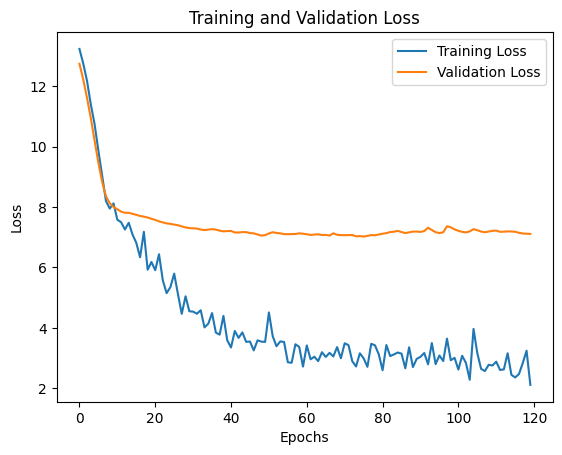

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Assuming 'history' contains the training history obtained from model.fit()
plot_training_history(history)

In [ ]:
# Predict upvote scores for test data
y_pred = model.predict(X_test_dense)

# Round the predicted values to the nearest integer
y_pred_rounded = np.round(y_pred)

#Output predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rounded.flatten()})
print("\nPredictions:")
print(predictions)



4/4 [==============================] - 0s 4ms/step

Predictions:
     Actual  Predicted
453     6.0        2.0
341     1.0        2.0
177     0.0        1.0
86      1.0        2.0
332     4.0        1.0
..      ...        ...
88      0.0        3.0
235     5.0        4.0
352     0.0        1.0
33      6.0        4.0
404     1.0        1.0

[112 rows x 2 columns]


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rounded)
print("Mean Squared Error:", mse)

# Define thresholds to categorize predicted upvote scores into bins
thresholds = [10, 20, 30]

# Categorize predicted upvote scores into bins
y_test_categories = pd.cut(y_test, bins=[-np.inf] + thresholds + [np.inf], labels=[f'<= {t}' for t in thresholds] + ['> max_threshold'])
y_pred_categories = pd.cut(y_pred_rounded.flatten(), bins=[-np.inf] + thresholds + [np.inf], labels=[f'<= {t}' for t in thresholds] + ['> max_threshold'])

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_categories, y_pred_categories)
print("\nConfusion Matrix:")
print(conf_matrix)


Mean Squared Error: 8.357142857142858

Confusion Matrix:
[[110   0   0]
 [  1   0   0]
 [  1   0   0]]


Random Forest Regressor

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

# Preprocess the data
X_tfidf = tfidf_vectorizer.fit_transform(newdf['features'])
y_score = newdf['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_score, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', MaxAbsScaler()),
    ('imputer', SimpleImputer(strategy='median')),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('model', RandomForestRegressor())
])

# Define hyperparameters for tuning
param_grid = {
    'feature_selection__k': [50, 100, 'all'],
    'model__n_estimators': [100, 200, 300,400],
    'model__max_depth': [None, 10, 20,30],
    'model__min_samples_split': [2, 5,7, 10]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Output predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted':  y_pred_rounded.flatten()})
print("\nPredictions:")
print(predictions)

print("Best Model:", best_model)

Mean Squared Error: 8.96069395030847

Predictions:
     Actual  Predicted
453     6.0        2.0
341     1.0        2.0
177     0.0        1.0
86      1.0        2.0
332     4.0        1.0
..      ...        ...
88      0.0        2.0
235     5.0        3.0
352     0.0        1.0
33      6.0        4.0
404     1.0        1.0

[112 rows x 2 columns]
Best Model: Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('imputer', SimpleImputer(strategy='median')),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x7f623c16b250>)),
                ('model', RandomForestRegressor(min_samples_split=7))])
